In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_images_filtered.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_masks_filtered.npy')

In [3]:
X_test = images[500:706]
y_test = masks[500:706]

In [4]:
images = images[0:500]
masks = masks[0:500]

In [5]:
images.shape

(500, 512, 512, 1)

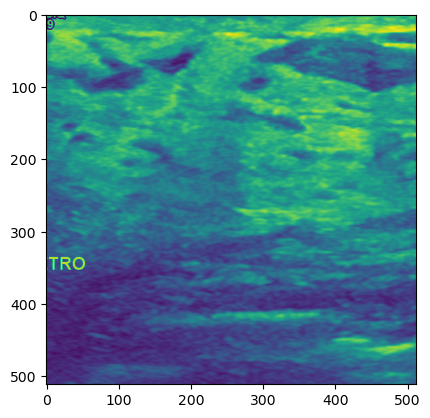

In [6]:
imshow(images[100])

In [7]:
masks.shape

(500, 512, 512, 1)

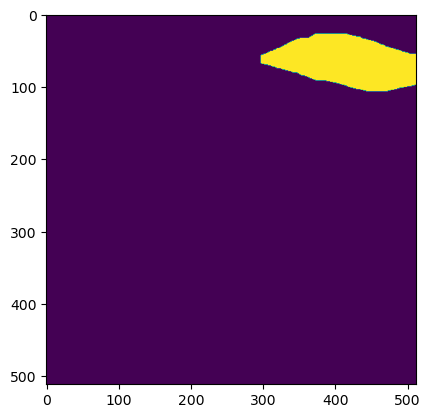

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNetPlus2D(loss=loss_fx, model_path='/tmp/tmpyli5cgjbkuc_unetplus2d/kuc_unetplus2d_0kuc_unetplus2d_model')

*** GP2  KUC UNetPlus2D ***
Working directory: /tmp/tmp_ddiavvpkuc_unetplus2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp_ddiavvpkuc_unetplus2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unetplus2d_0kuc_unetplus2d_1_5_BreastUltrasound.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 14s 5s/step - loss: 0.4135 - dice_coeff: 0.3269 - val_loss: 1.5566 - val_dice_coeff: 2.8783e-15
Epoch 2/100
2/2 [==============================] - 1s 503ms/step - loss: 1.0405 - dice_coeff: 4.5832e-15 - val_loss: 1.5566 - val_dice_coeff: 2.8783e-15
Epoch 3/100
2/2 [==============================] - 1s 506ms/step - loss: 1.0405 - dice_coeff: 5.1482e-15 - val_loss: 1.5566 - val_dice_coeff: 2.8783e-15
Model saved to: /tmp/tmp_ddiavvpkuc_unetplus2d/kuc_unetplus2d_0kuc_unetplus2d_model
History saved to: /tmp/tmp_ddiavvpkuc_unetplus2d/kuc_unetplus2d_history_0.pkl
Testing the classifier...
Model saved to /tmp/tmp_ddiavvpkuc_unetplus2d/cnnd_0.model
History saved to /tmp/tmp_ddiavvpkuc_unetplus2d/cnnd_history_0.pickle
Testing the discriminator...
1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 14 machine labels.
Replacing 4 from 14 !
D_relabeled_ 4
point

In [16]:
R.classifier_scores

[[1.602124810218811, 1.2400858809334496e-15],
 [1.6469545364379883, 1.2019977739107391e-15],
 [1.639824390411377, 1.203142221301598e-15],
 [1.6411876678466797, 1.2131422922768823e-15],
 [1.631177544593811, 1.232955345825226e-15]]

In [17]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

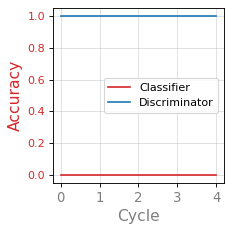

In [18]:
R.plot()

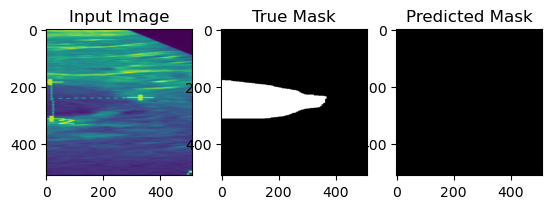

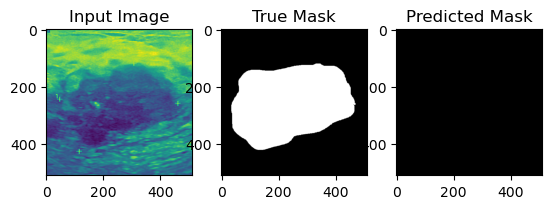

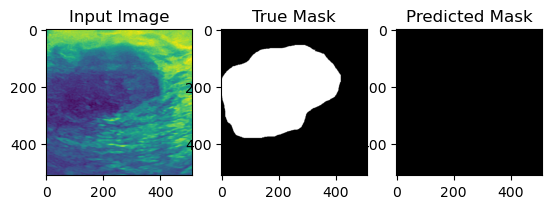

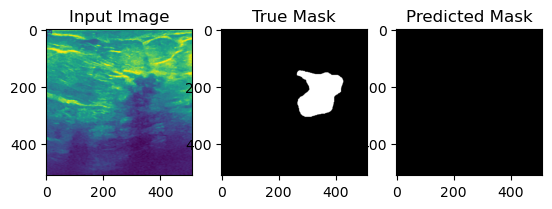

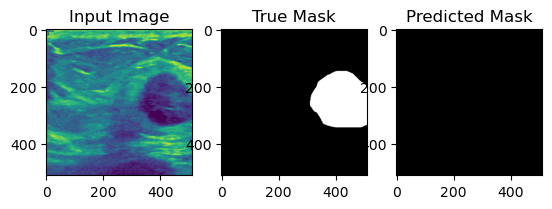

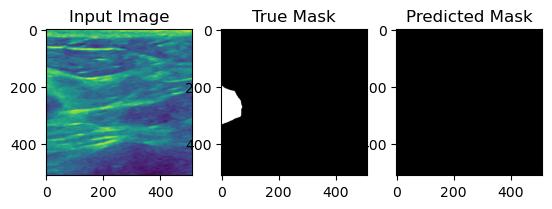

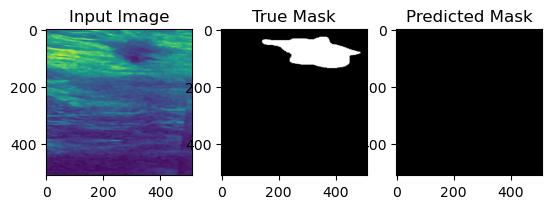

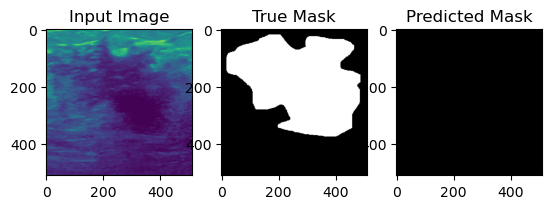

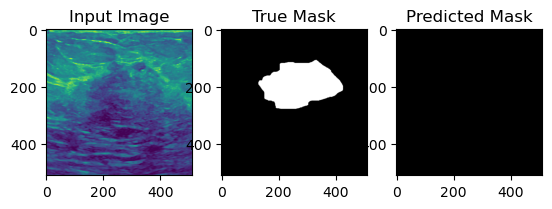

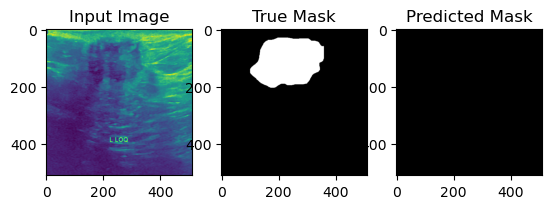

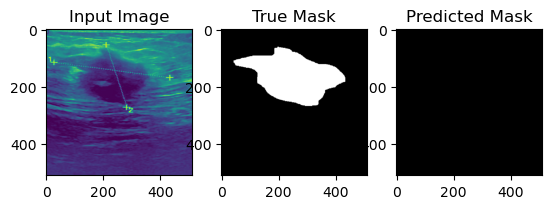

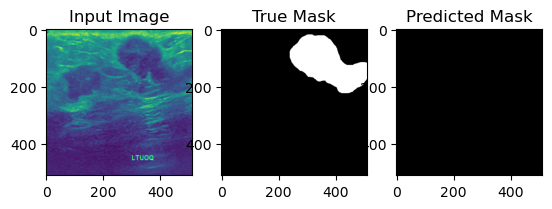

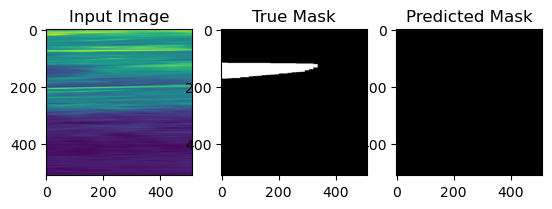

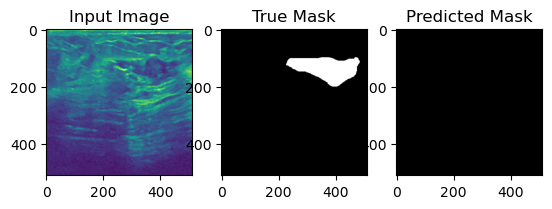

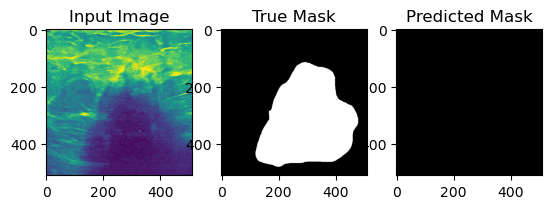

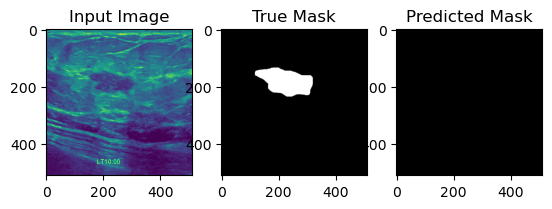

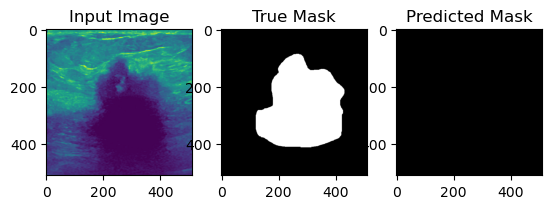

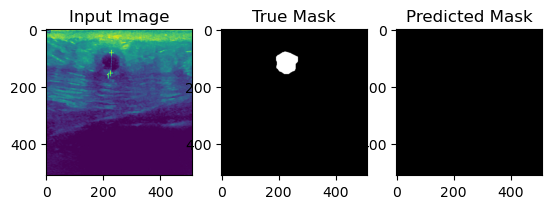

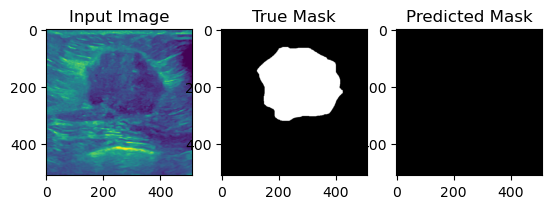

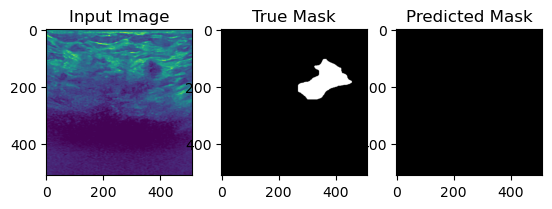

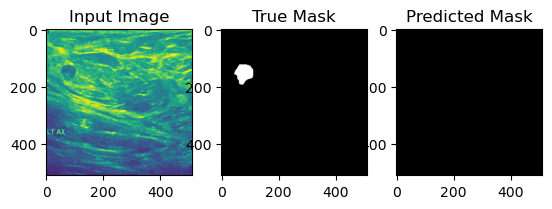

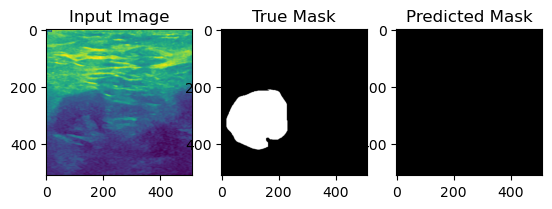

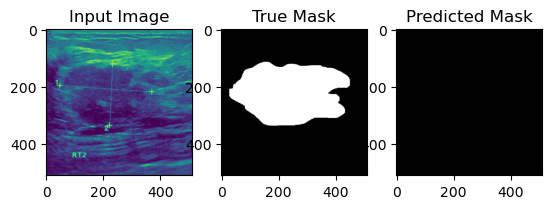

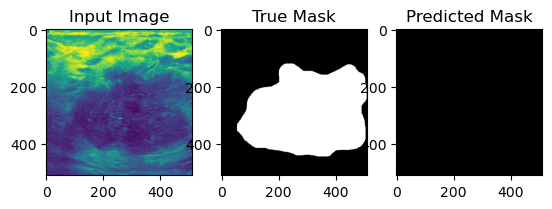

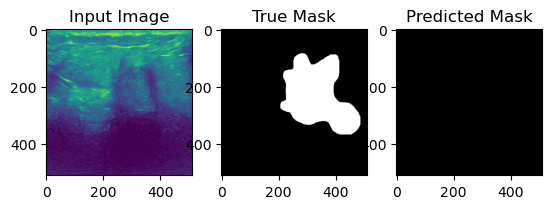

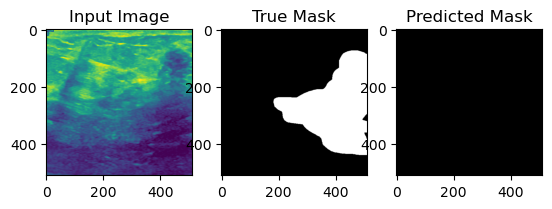

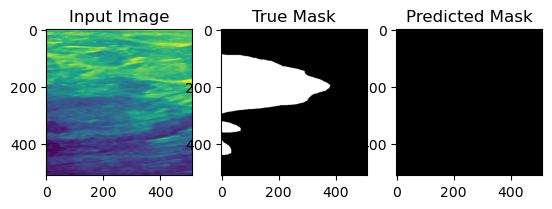

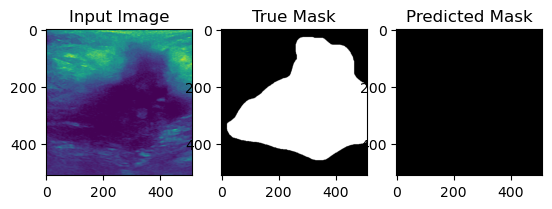

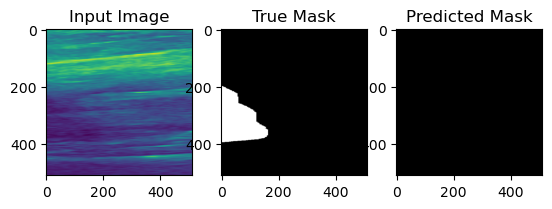

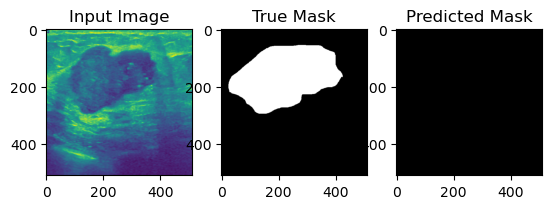

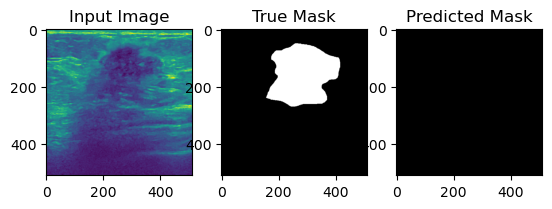

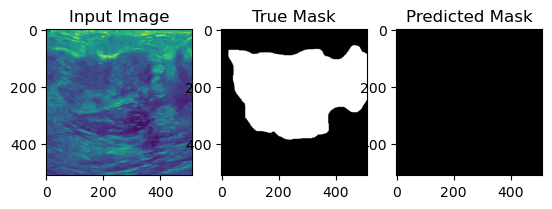

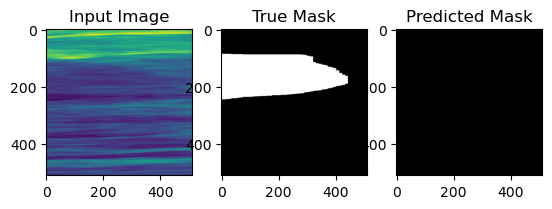

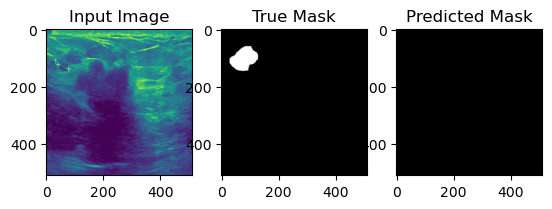

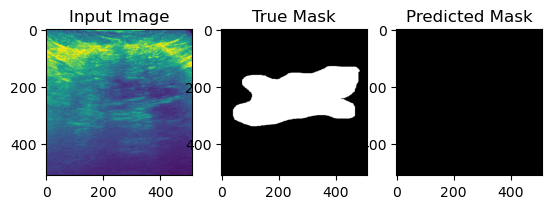

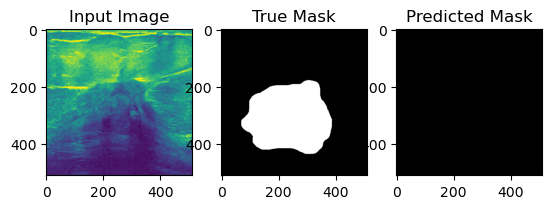

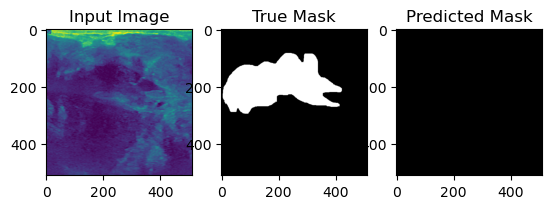

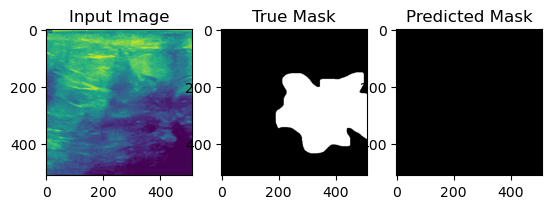

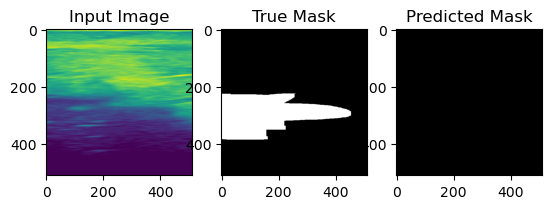

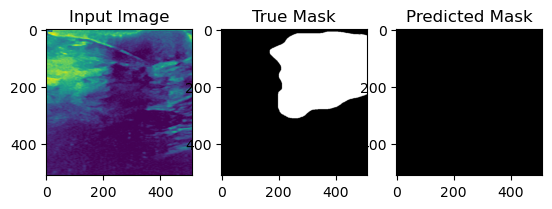

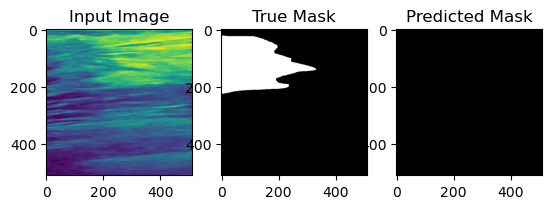

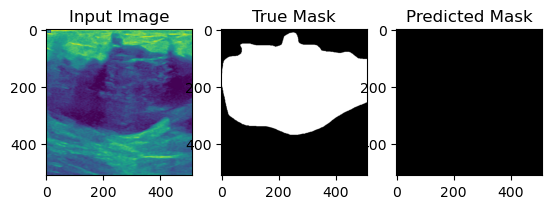

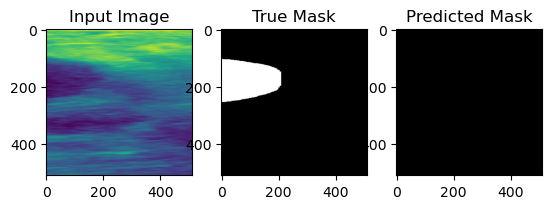

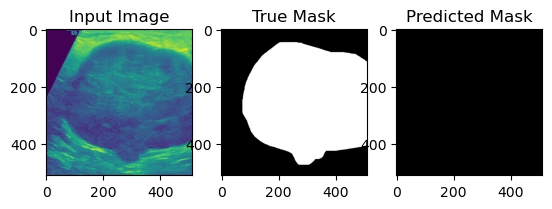

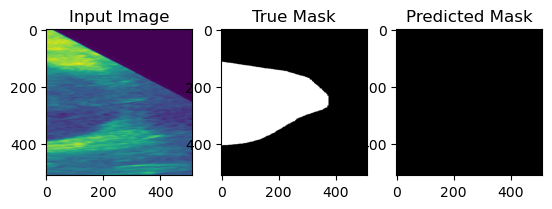

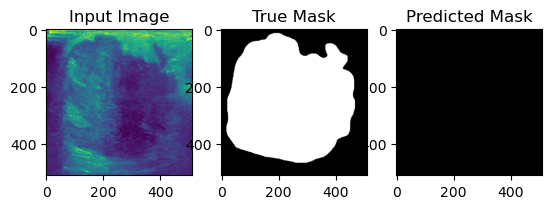

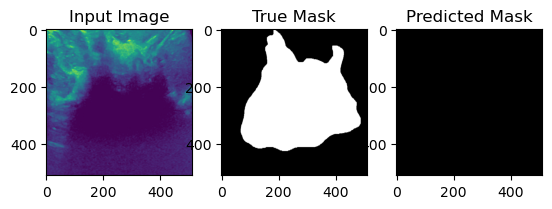

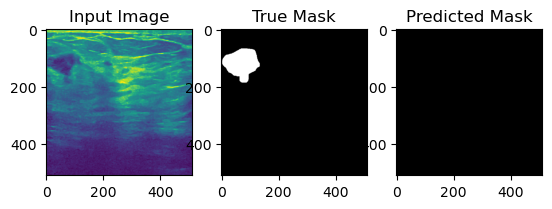

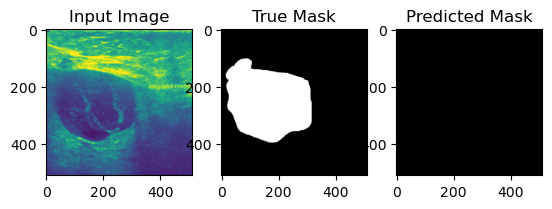

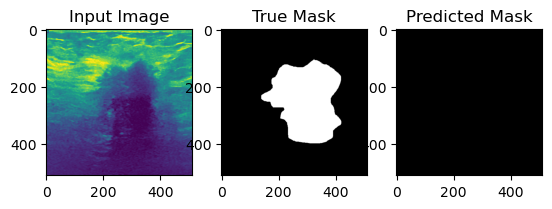

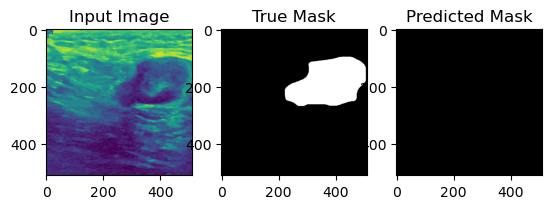

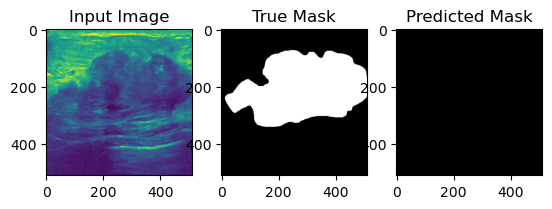

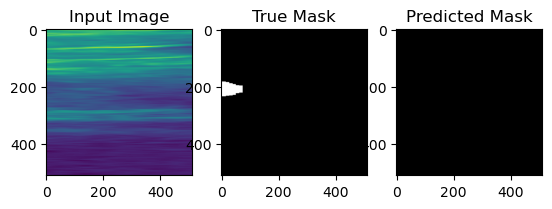

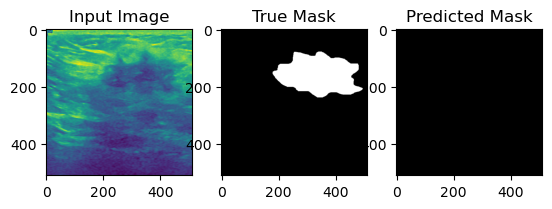

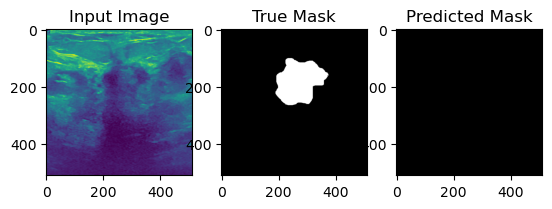

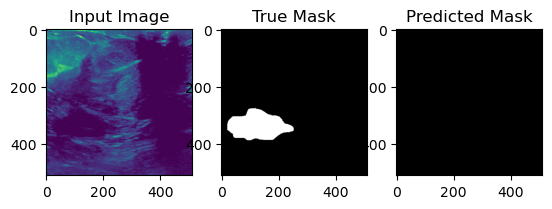

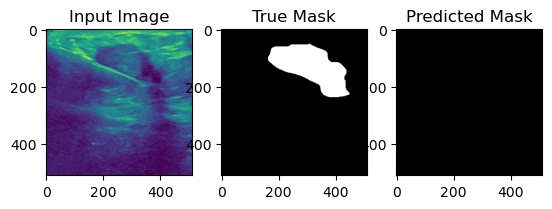

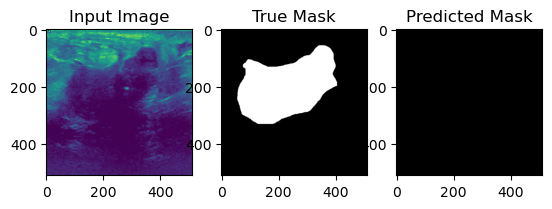

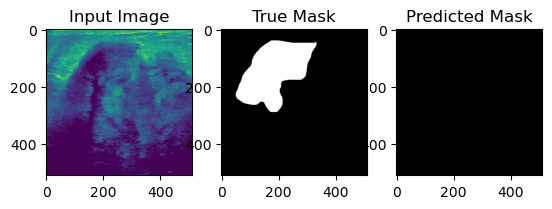

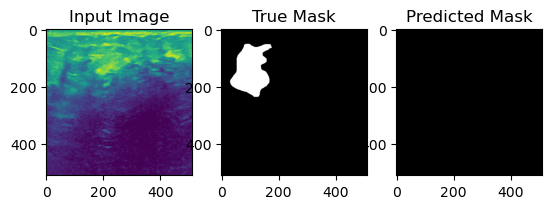

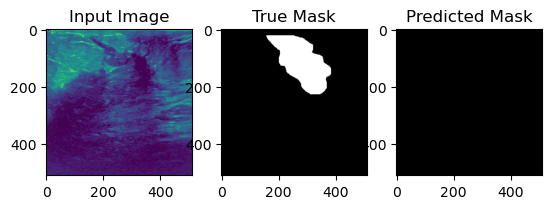

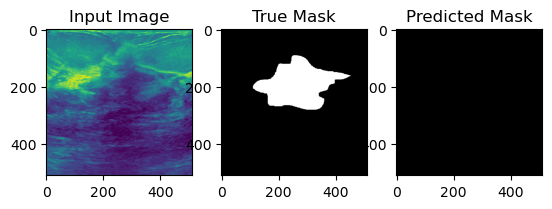

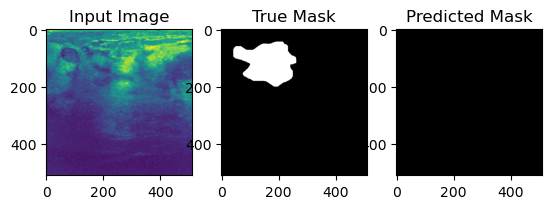

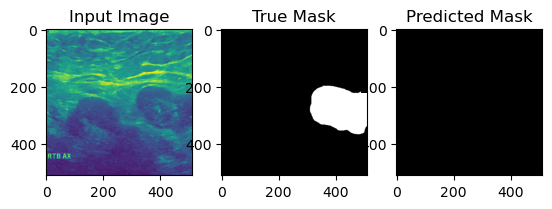

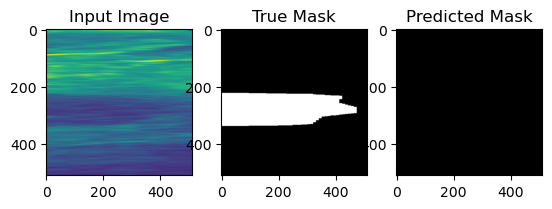

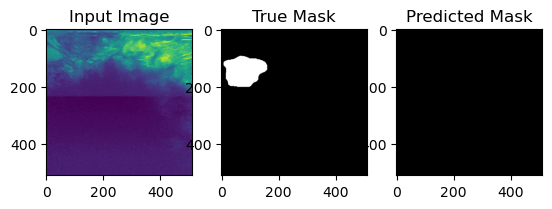

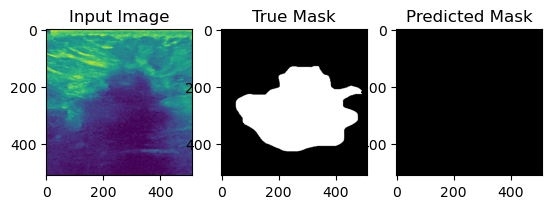

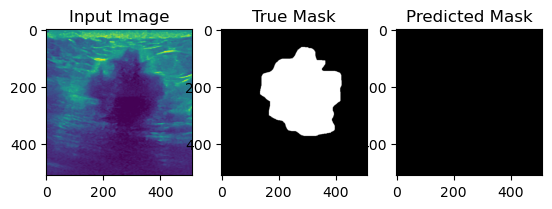

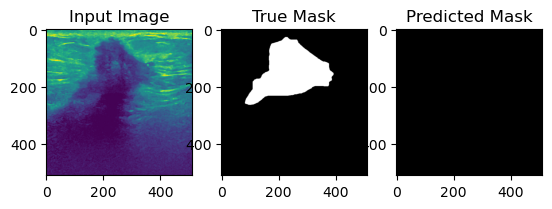

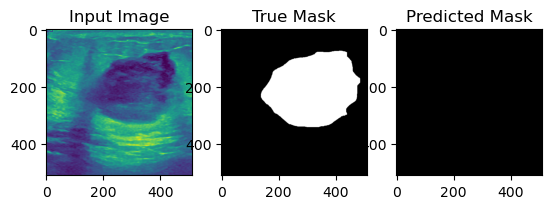

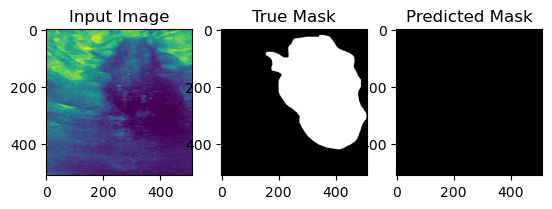

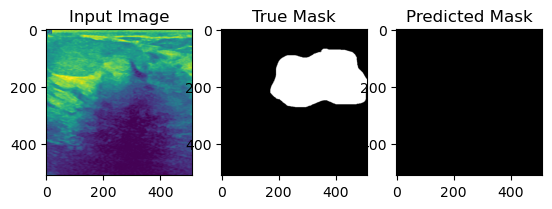

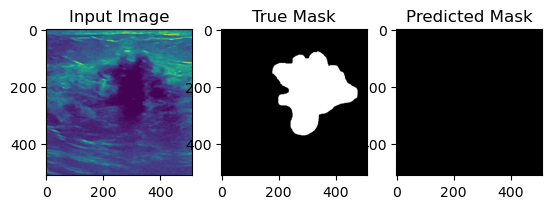

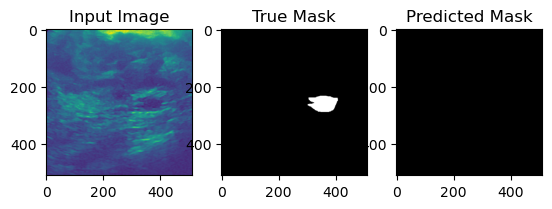

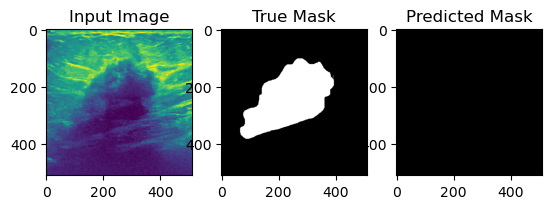

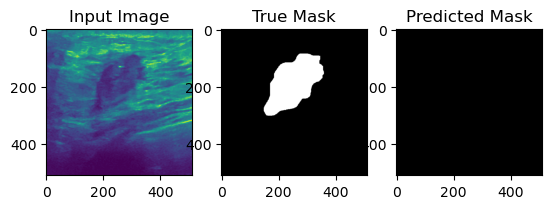

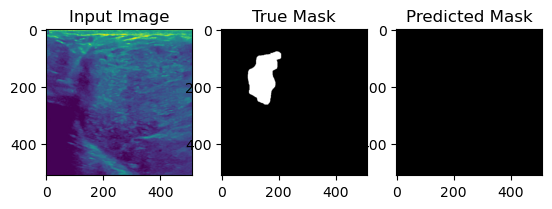

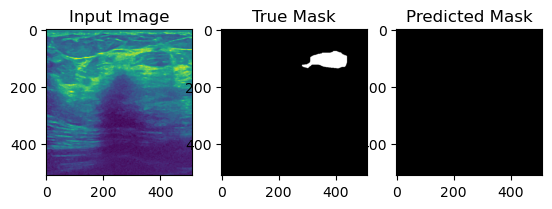

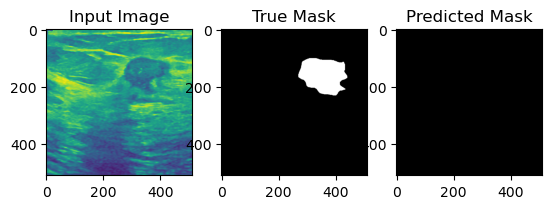

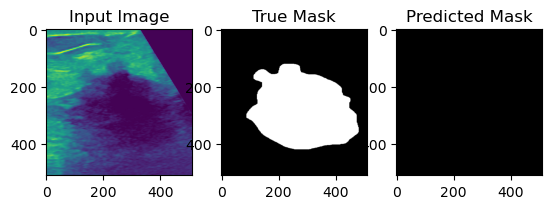

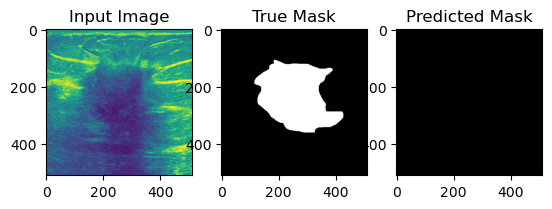

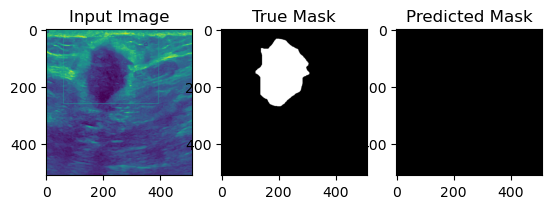

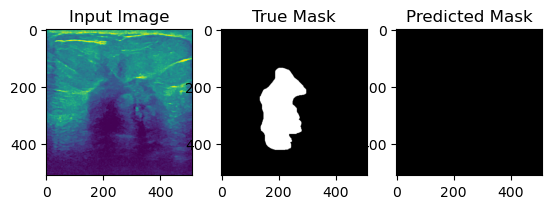

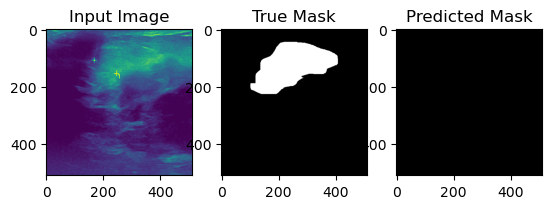

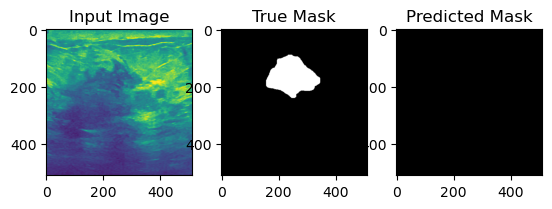

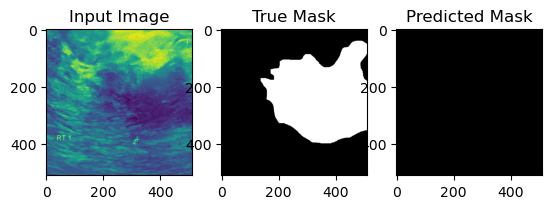

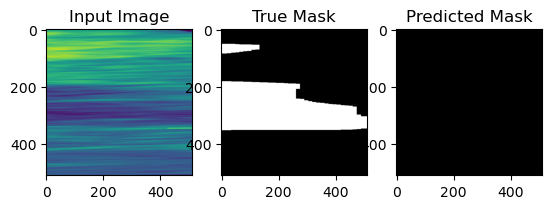

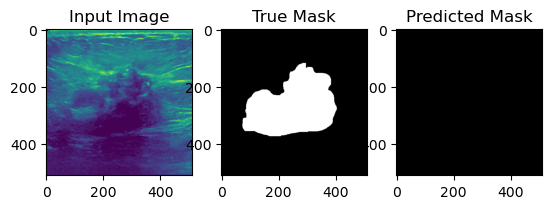

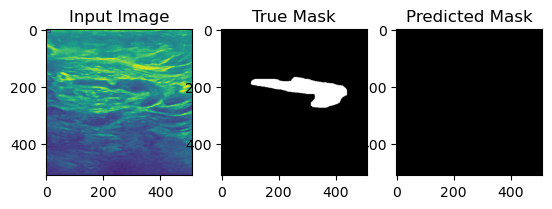

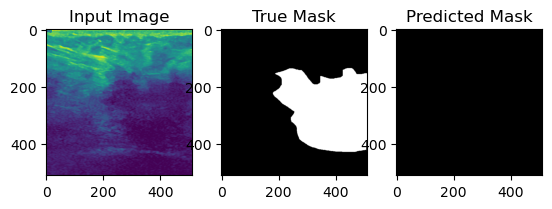

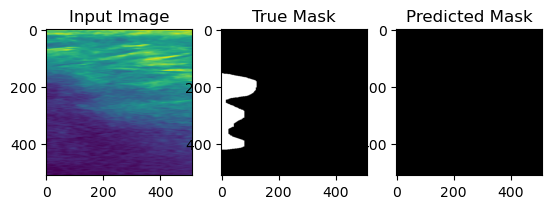

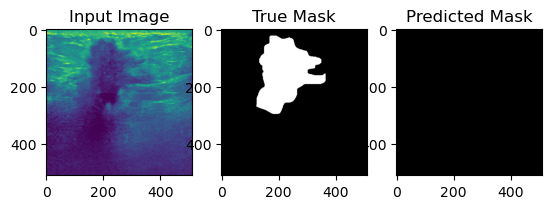

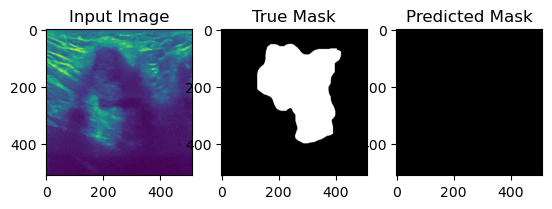

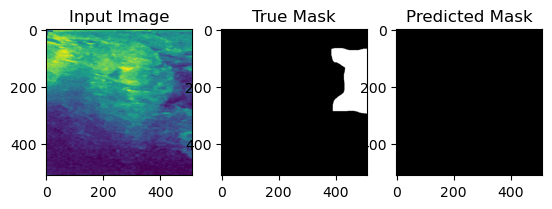

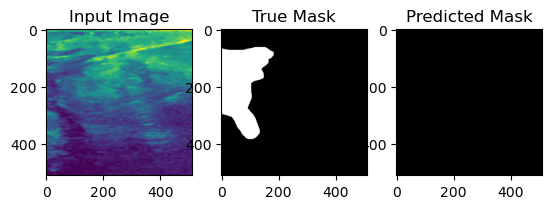

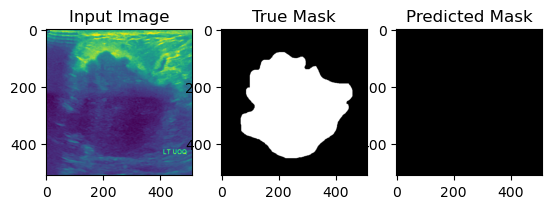

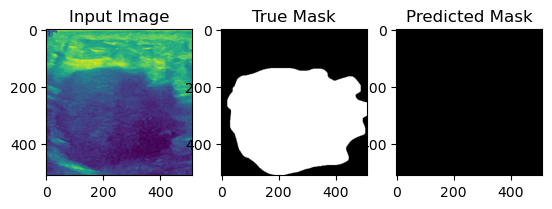

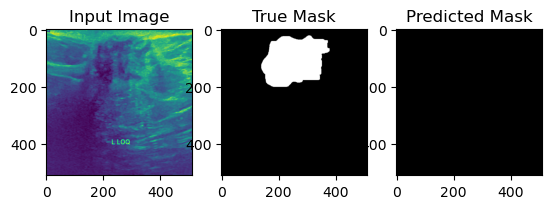

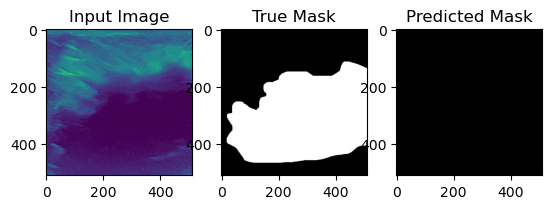

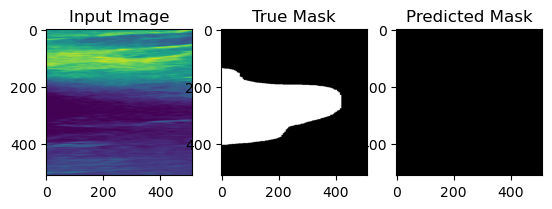

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNetPlus2D(loss=loss_fx, model_path='/tmp/tmpyli5cgjbkuc_unetplus2d/kuc_unetplus2d_0kuc_unetplus2d_model')

*** GP2  KUC UNetPlus2D ***
Working directory: /tmp/tmp_ddiavvpkuc_unetplus2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']